In [2]:
!pip install pennylane

  Using cached PennyLane-0.28.0-py3-none-any.whl (1.3 MB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached autograd-1.5-py3-none-any.whl (48 kB)
  Using cached ninja-1.11.1-py2.py3-none-win_amd64.whl (313 kB)


In [3]:
import pennylane as qml
from pennylane import numpy as np

In order to build a quantum circuit, we need to marry two things.<br>
1. A quantum device
2. A quantum function

And we return an expectation value of a physical observable (like the PauliZ gate for example) from this function

In [4]:
# Instantiating a quantum device...
device = qml.device("default.qubit", wires=2) # takes two main arguments - 1st- a string associated with the device name & 2nd-the number of qubits (called as wires)

In [6]:
# Defining a quantum function now
@qml.qnode(device)     # A decorator for encapsulating both our device and our quantum function (which has the instructions to be executed on that device)
def circuit(theta):    # Just like in qiskit, all qubits are initialized in |0> state by default
    qml.PauliX(wires=1)        # apply a X gate on 2nd qubit
    qml.CNOT(wires=[1,0])      # apply a CNOT gate with the 2nd qubit as the control and the 1st one as the target
    qml.RY(theta, wires=0)     # apply an Ry gate on the first qubit with the parameter being theta on the first qubit
    return qml.expval(qml.PauliZ(wires=0))  # return the expectation value of the Z gate applied to the first qubit

We have listed the instructions for our quantum function to perform. 

Now, how to execute these instructions on the device?
In pennylane, the units of computation are represented by using an object called a Quantum Node (QNode).

A quantum node encapsulates our device and our quantum function.
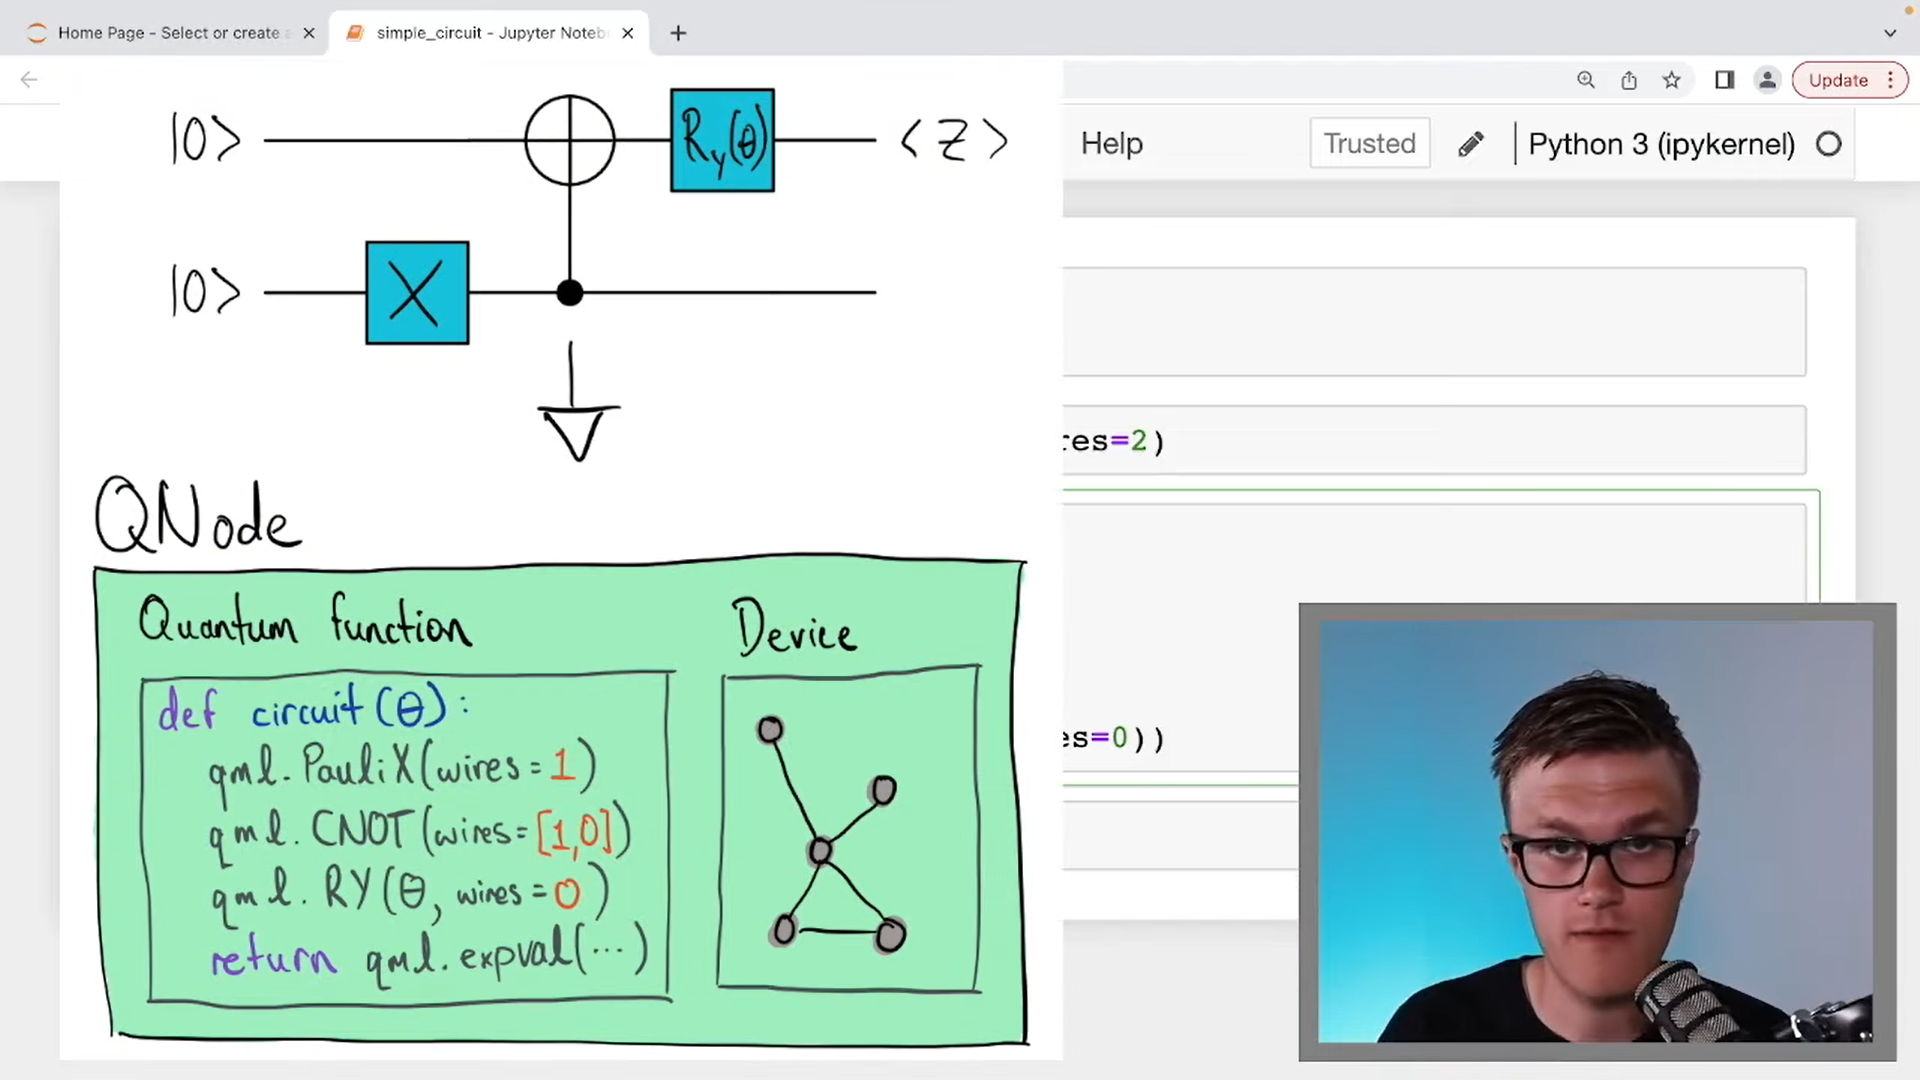

We do this in the code through using a decorator above our quantum function

In [7]:
print(circuit(np.pi))   # testing our code for a particular theta parameter=pi 

1.0


In [9]:
print(circuit(np.pi/2))  # expectation value on the zeroth qubit with the Z gate observable applied (theta = pi/2)

0.0


In [10]:
print(circuit(np.pi/3))  # expectation value on the zeroth qubit with the Z gate observable applied (theta = pi/3)

-0.5000000000000002


In [11]:
print(circuit(np.pi/5))  # expectation value on the zeroth qubit with the Z gate observable applied (theta = pi/5)

-0.8090169943749473


In [12]:
print(circuit(2*np.pi/3))  # expectation value on the zeroth qubit with the Z gate observable applied (theta = 2pi/3)

0.4999999999999998


In [13]:
# Let's take a range of theta values and then plot the expectation values
import matplotlib.pyplot as plt

In [17]:
thetas= np.arange(-np.pi, np.pi, 0.01)  # start, stop, step (returns an array of evenly-spaced values)

In [18]:
print(thetas)

[-3.14159265e+00 -3.13159265e+00 -3.12159265e+00 -3.11159265e+00
 -3.10159265e+00 -3.09159265e+00 -3.08159265e+00 -3.07159265e+00
 -3.06159265e+00 -3.05159265e+00 -3.04159265e+00 -3.03159265e+00
 -3.02159265e+00 -3.01159265e+00 -3.00159265e+00 -2.99159265e+00
 -2.98159265e+00 -2.97159265e+00 -2.96159265e+00 -2.95159265e+00
 -2.94159265e+00 -2.93159265e+00 -2.92159265e+00 -2.91159265e+00
 -2.90159265e+00 -2.89159265e+00 -2.88159265e+00 -2.87159265e+00
 -2.86159265e+00 -2.85159265e+00 -2.84159265e+00 -2.83159265e+00
 -2.82159265e+00 -2.81159265e+00 -2.80159265e+00 -2.79159265e+00
 -2.78159265e+00 -2.77159265e+00 -2.76159265e+00 -2.75159265e+00
 -2.74159265e+00 -2.73159265e+00 -2.72159265e+00 -2.71159265e+00
 -2.70159265e+00 -2.69159265e+00 -2.68159265e+00 -2.67159265e+00
 -2.66159265e+00 -2.65159265e+00 -2.64159265e+00 -2.63159265e+00
 -2.62159265e+00 -2.61159265e+00 -2.60159265e+00 -2.59159265e+00
 -2.58159265e+00 -2.57159265e+00 -2.56159265e+00 -2.55159265e+00
 -2.54159265e+00 -2.53159

In [41]:
exp_values = []
for theta in thetas:
    exp_val = circuit(theta)
    exp_values.append(exp_val)

print(exp_values)

[tensor(1., requires_grad=True), tensor(0.99995, requires_grad=True), tensor(0.99980001, requires_grad=True), tensor(0.99955003, requires_grad=True), tensor(0.99920011, requires_grad=True), tensor(0.99875026, requires_grad=True), tensor(0.99820054, requires_grad=True), tensor(0.997551, requires_grad=True), tensor(0.99680171, requires_grad=True), tensor(0.99595273, requires_grad=True), tensor(0.99500417, requires_grad=True), tensor(0.9939561, requires_grad=True), tensor(0.99280864, requires_grad=True), tensor(0.99156189, requires_grad=True), tensor(0.990216, requires_grad=True), tensor(0.98877108, requires_grad=True), tensor(0.98722728, requires_grad=True), tensor(0.98558477, requires_grad=True), tensor(0.98384369, requires_grad=True), tensor(0.98200424, requires_grad=True), tensor(0.98006658, requires_grad=True), tensor(0.97803091, requires_grad=True), tensor(0.97589745, requires_grad=True), tensor(0.9736664, requires_grad=True), tensor(0.97133797, requires_grad=True), tensor(0.9689124

In [27]:
qml.expval??

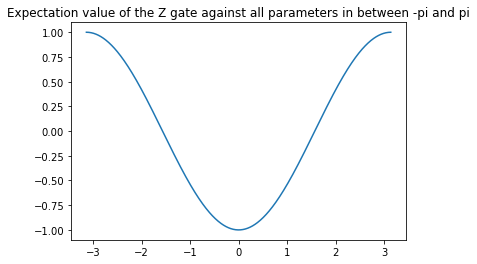

In [45]:
plt.plot(thetas, exp_values)
plt.title('Expectation value of the Z gate against all parameters in between -pi and pi')
plt.show()